<a href="https://colab.research.google.com/github/sarahalayan/Business_Analytics_with_Excel/blob/main/appRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [349]:
import pandas as pd
df = pd.read_csv('googleplaystore.csv')
df.head()
df.shape

(10841, 13)

In [350]:
# Count null values in each column
null_counts = df.isnull().sum()
print(null_counts)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [351]:
# Drop rows with any null values
df = df.dropna()
df.shape

(9360, 13)

In [352]:
def convert_size(size):
    if 'M' in size:
        x=size[:-1]
        x=float(x)*1000
        return(x)
    elif 'k'==size[:-1]:
        x=size[:-1]
        x=float(x)
        return(x)
    else:
      return None

df["Size"]=df["Size"].map(convert_size)
# Convert reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])

# Convert installs to numeric (handling '+')
def remove_plusandcommas(val):
    return int(val.replace(",","").replace("+",""))

df.Installs=df.Installs.map(remove_plusandcommas)

# Convert price to numeric (removing '$')
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'])
df.shape

<ipython-input-352-ceb90213b7bf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Size"]=df["Size"].map(convert_size)
<ipython-input-352-ceb90213b7bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews'] = pd.to_numeric(df['Reviews'])
<ipython-input-352-ceb90213b7bf>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

(9360, 13)

In [353]:
# Check for invalid ratings
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]
df.shape



(9360, 13)

In [354]:
# Check if reviews exceed installs
df = df[df['Reviews'] <= df['Installs']]
df.shape



(9353, 13)

In [355]:
df.shape




(9353, 13)

In [356]:
# Check for free apps with non-zero prices
df = df[(df['Type'] == 'Paid') | (df['Price'] == 0)]

df['Price']

,Price
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
10834,0.0
10836,0.0
10837,0.0
10839,0.0


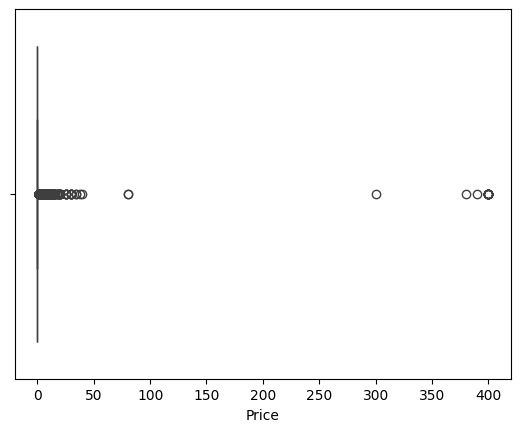

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Price
sns.boxplot(x='Price', data=df)
plt.show()



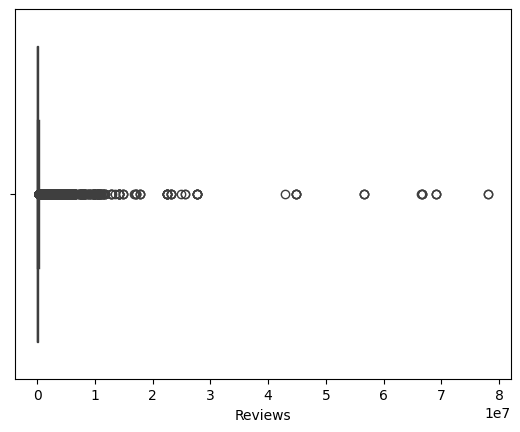

In [358]:
# Boxplot for Reviews
sns.boxplot(x='Reviews', data=df)
plt.show()


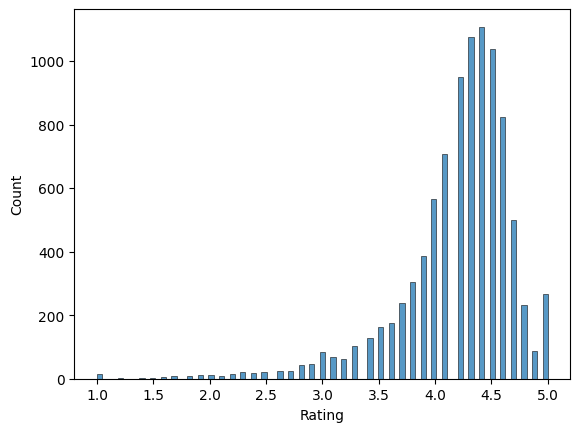

In [359]:
# Histogram for Rating
sns.histplot(x='Rating', data=df)
plt.show()

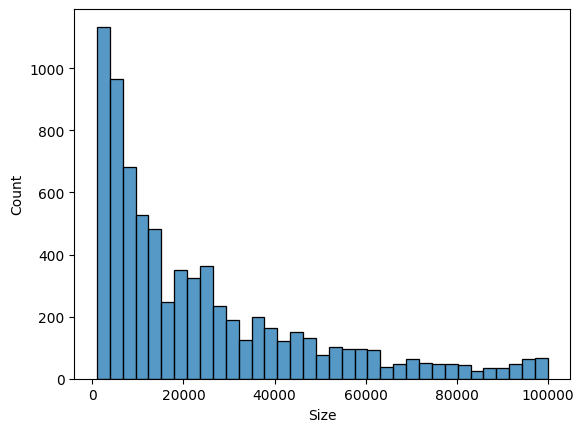

In [360]:
# Histogram for Size
sns.histplot(x='Size', data=df)
plt.show()

In [361]:
print(df['Price'])
# Price outlier treatment
df = df[df['Price'] <= 200]


df.shape

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9353, dtype: float64


(9338, 13)

In [362]:
# Reviews outlier treatment
df = df[df['Reviews'] < 2000000]
df.shape

(8885, 13)

In [363]:
# Installs outlier treatment
# Calculate percentiles
percentiles = df['Installs'].quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99])
print(percentiles)

# Choose a threshold (e.g., 99th percentile)
installs_threshold = percentiles[0.99]
df = df[df['Installs'] <= installs_threshold]

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64


In [364]:
df.shape

(8865, 13)

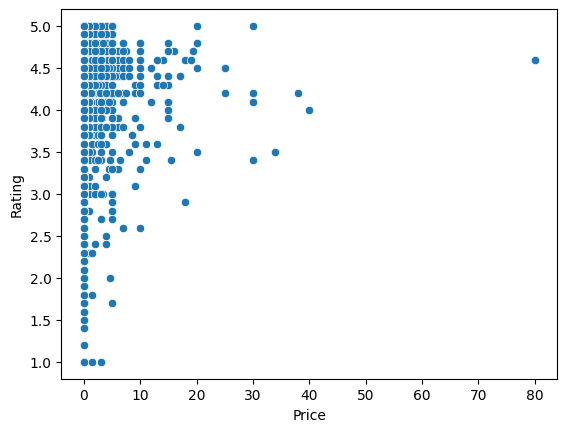

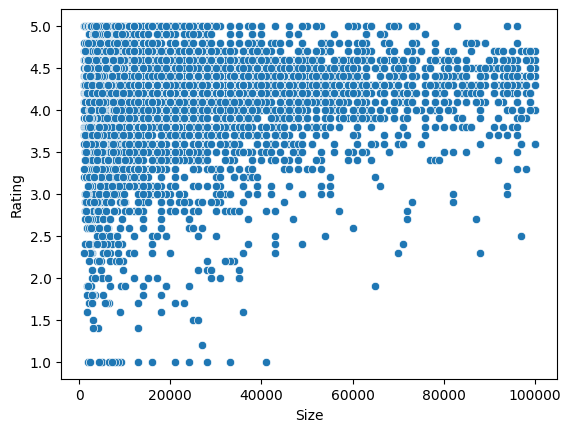

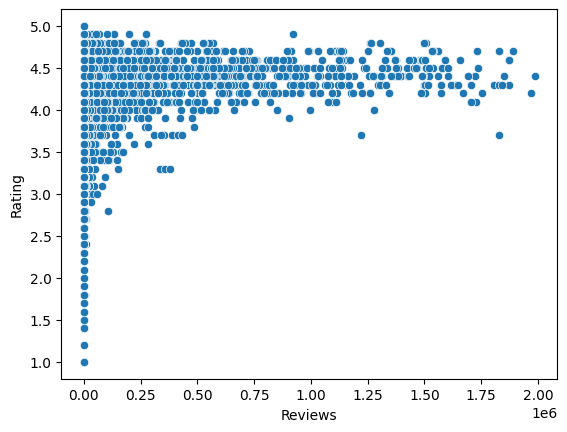

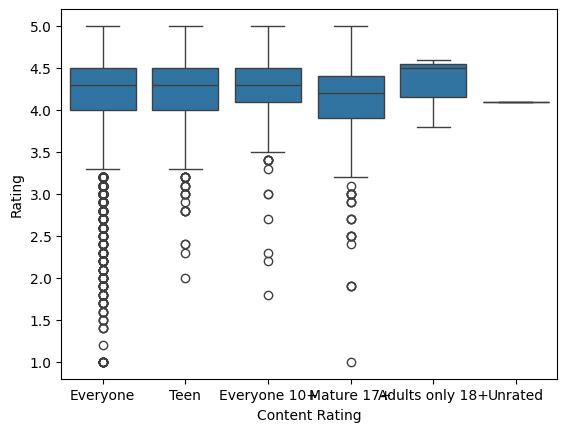

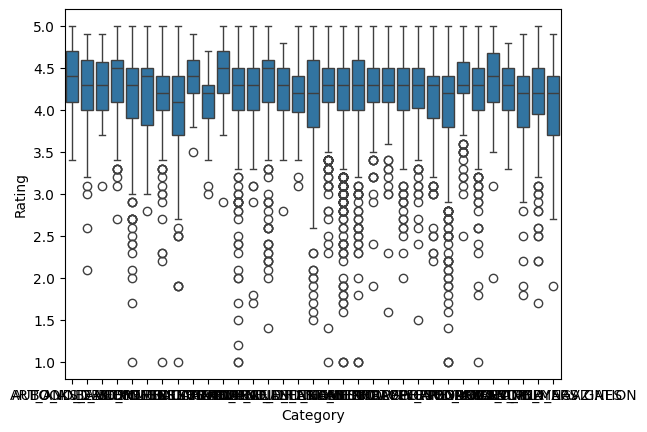

In [365]:
# Scatter plot for Rating vs. Price
sns.scatterplot(x='Price', y='Rating', data=df)
plt.show()

# Scatter plot for Rating vs. Size
sns.scatterplot(x='Size', y='Rating', data=df)
plt.show()

# Scatter plot for Rating vs. Reviews
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.show()

# Box plot for Rating vs. Content Rating
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.show()

# Box plot for Ratings vs. Category
sns.boxplot(x='Category', y='Rating', data=df)
plt.show()

In [366]:
inp1=df.copy()

In [367]:
import numpy as np

# Log transformation for Reviews and Installs
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

# Drop unnecessary columns
inp1 = inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

# Get dummy variables for categorical features
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating', 'Type'])
# Check for missing values
print(inp2.isnull().sum())

# Impute missing values using fillna
# You can choose different strategies like mean, median, or a constant value
inp2 = inp2.fillna(0)

Rating                          0
Reviews                         0
Size                         1646
Installs                        0
Price                           0
                             ... 
Content Rating_Mature 17+       0
Content Rating_Teen             0
Content Rating_Unrated          0
Type_Free                       0
Type_Paid                       0
Length: 161, dtype: int64


In [368]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = inp2.drop('Rating', axis=1)
y = inp2['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [369]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
r2_train = r2_score(y_train, y_pred_train)
print("R-squared on training set:", r2_train)

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Evaluate the model on the testing set
r2_test = r2_score(y_test, y_pred_test)
print("R-squared on testing set:", r2_test)

R-squared on training set: 0.16619090186831653
R-squared on testing set: 0.129468383591528


In [370]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate the mean cross-validation score
mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [-0.03663053 -0.02350339  0.13159127  0.10460975  0.076211  ]
Mean cross-validation score: 0.050455621894500056


In [371]:
X.shape

(8865, 160)